## EDA on Habermans cancer data

### Importing all required libraries

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reading Csv file

In [40]:
df = pd.read_csv('haberman.csv', header = None)

giving names to all columns

In [41]:
df.columns = ['Age', 'Op_year', 'axil_nodes', 'status']
df.head()

,Age,Op_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Data understanding
- Age=Age of patient at time of operation (numerical)
- Op_Year =Patient's year of operation (year - 1900, numerical)
- axil_nodes=Number of positive axillary nodes detected (numerical)
- Surv_status=Survival status (class attribute)
   1 = the patient survived 5 years or longer   
   2 = the patient died within 5 year

In [42]:
df.shape

(306, 4)

Finding Min and Max age of  patients

In [43]:
print("Maximum age of patient: ", max(df['Age']))
print("Minimum age of patient: ",min(df['Age']))

Maximum age of patient:  83
Minimum age of patient:  30


Calculation of individual counts of patients those who survived and those who did not

In [44]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

### Observation
- 225 patients survived 5 yrs/ longer after surgery
- 81 patients died within 5 years
- Number of '2' labels are very less as compared to '1', so we can say that the data is unbalanced

Plotting a pair Plot graph for more analysis

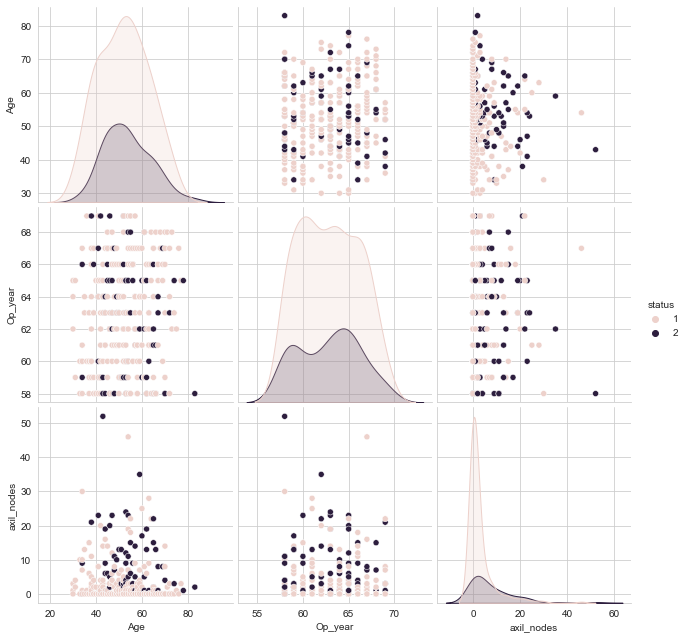

In [45]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", height=3);
plt.show()

### Observation

- Year of operation has no effect on how long the patient lives. Since in graph of Op_year vs axil_nodes we can see there have been deaths in almost every year.
- So we can ignore this Column and go ahead with axil_nodes and age of patient
- We see that there are no outliers in the dataset

<AxesSubplot:xlabel='axil_nodes', ylabel='Age'>

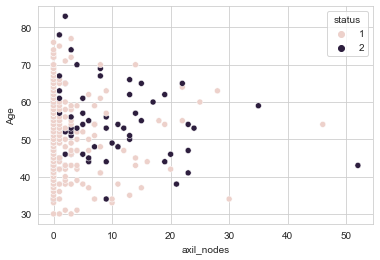

In [46]:
sns.scatterplot(data=df, x="axil_nodes", y="Age", hue = "status")

In [47]:

grouped_df=df.groupby("status")
maximums = grouped_df.max()
print(maximums)

        Age  Op_year  axil_nodes
status                          
1        77       69          46
2        83       69          52


In [48]:
grouped_df=df.groupby("status")
maximums = grouped_df.min()
print(maximums)

        Age  Op_year  axil_nodes
status                          
1        30       58           0
2        34       58           0


### Observations
Even a person with 0 axil_nodes has died and also a person with 46 axil_nodes has survived.

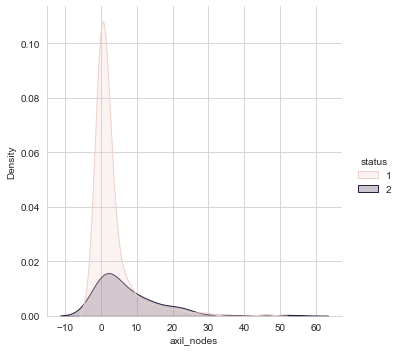

In [49]:
# propbability distriution of axil_nodes
sns.displot(df, x="axil_nodes", hue="status", kind="kde", fill=True)

<AxesSubplot:xlabel='axil_nodes', ylabel='Proportion'>

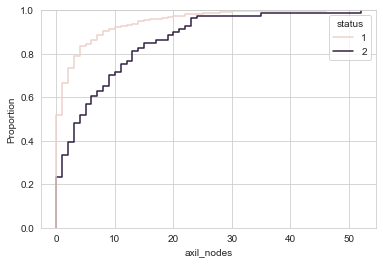

In [50]:
# cumulative frequency graph
sns.ecdfplot(df, x="axil_nodes", hue="status")

### Observations
- Most patients with 0 axil_nodes have survived
- We can see if axil_nodes > 10, there are deaths and live cases both, i.e the data is very mixed or the number of data points are few for 2 label

### Understanding median and quartiles

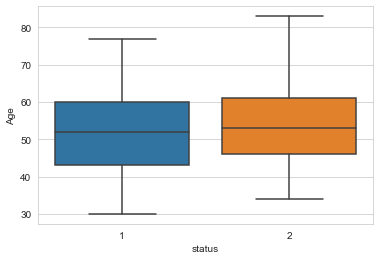

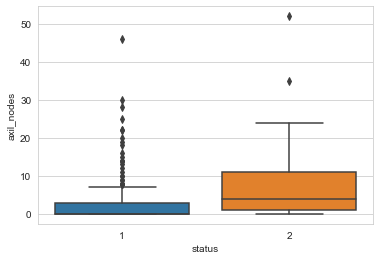

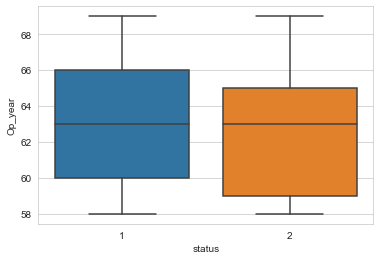

In [51]:
sns.boxplot(x='status',y='Age', data=df)
plt.show()
sns.boxplot(x='status',y='axil_nodes', data=df)
plt.show()
plt.show()
sns.boxplot(x='status',y='Op_year', data=df)
plt.show()

### Observations

- From plot 1: box plot of Age by status we can see that the medians are very close that means, people of the age about 50 have both survied the most and also maximum deaths took place of people in that same age group
- From plot 2: box plot of Axil_nodes by status we can see that the median of stuatus 1 is at 0, indicating none of the people with 0 axil nodes died.
- Maximum number of people who died have 4 or 5 axil nodes, i.e the median of axil_nodes with status 2
- From Q1 (1st quartile) to Q2(median) the number of people died is less as compared to from Q2 to Q3(75 percentile). This indicated that people having more number of axil_nodes have higher chances of dying
- In plot 3 for operation year the median for both classes are the same, this indicates that op_year has hardly any affect on the class of the data point.

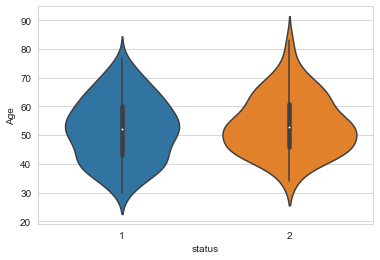

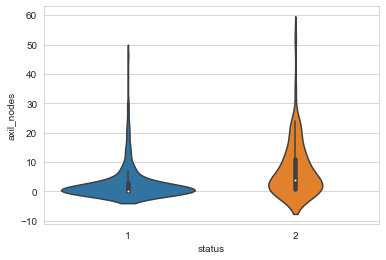

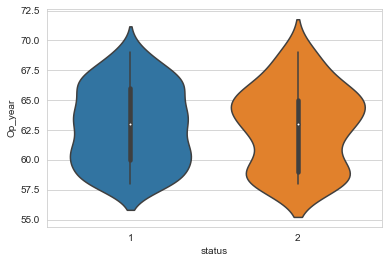

In [52]:
sns.violinplot(x="status", y="Age", data=df, size=8)
plt.show()
sns.violinplot(x="status", y="axil_nodes", data=df, size=8)
plt.show()
sns.violinplot(x="status", y="Op_year", data=df, size=8)
plt.show()

### Final Observations

- The year of operation does not have any imact on the class of the data point
- Most of the people who survived more than 5 years after operations had 0 axil_nodes
- Most of the poeple who died within 5 years of operation had about 4 or 5 axilary nodes
- The data is very wide spread and is undersampled
- Age matters more as the age of the person exceeds 60, since there are higher chances of the person dying. As in our data 2 out of 3 have died